# EDA of Prospect Data

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [65]:
df = pd.read_csv('/kaggle/input/prospect-data/company_data_filter/Working All Data Latest 1 - ApolloProspects.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       19559 non-null  object
 1   Domain        19863 non-null  object
 2   Name          19863 non-null  object
 3   Job Title     19863 non-null  object
 4   Location      19396 non-null  object
 5   Keywords      19288 non-null  object
 6   LinkedIn URL  15344 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB
None
              Company              Domain                Name  \
0  1019 Senior Living  1019healthcare.com   Heather K\n------   
1  1019 Senior Living  1019healthcare.com         Mari Adkins   
2                 NaN       1carekids.com    Rhonda W\n------   
3          1Care Kids       1carekids.com  Courtney K\n------   
4           1+1 Cares     1plus1cares.com   Melissa A\n------   

                         Job Title              Location  \
0          Chief E

In [66]:
print("Total rows:", len(df))
print("Unique companies:", df['Company'].nunique())
print("Unique job titles:", df['Job Title'].nunique())
print("Unique locations:", df['Location'].nunique())
print("LinkedIn profiles present:", df['LinkedIn URL'].notna().sum())


Total rows: 19863
Unique companies: 4367
Unique job titles: 7455
Unique locations: 3970
LinkedIn profiles present: 15344


# Most Common Job Titles

In [67]:
print(df['Job Title'].value_counts().head(10))

Job Title
Owner                      1179
Director                    570
Chief Executive Officer     457
Executive Director          402
President                   401
Clinical Director           282
CEO                         269
Founder                     260
Director of Operations      244
Business Owner              232
Name: count, dtype: int64


# Most Common Locations

In [68]:
print(df['Location'].value_counts().head(10))

Location
United States                 728
New York, New York            608
Chicago, Illinois             381
Dallas, Texas                 311
Boston, Massachusetts         265
San Francisco, California     253
Los Angeles, California       252
Atlanta, Georgia              236
Houston, Texas                220
Philadelphia, Pennsylvania    212
Name: count, dtype: int64


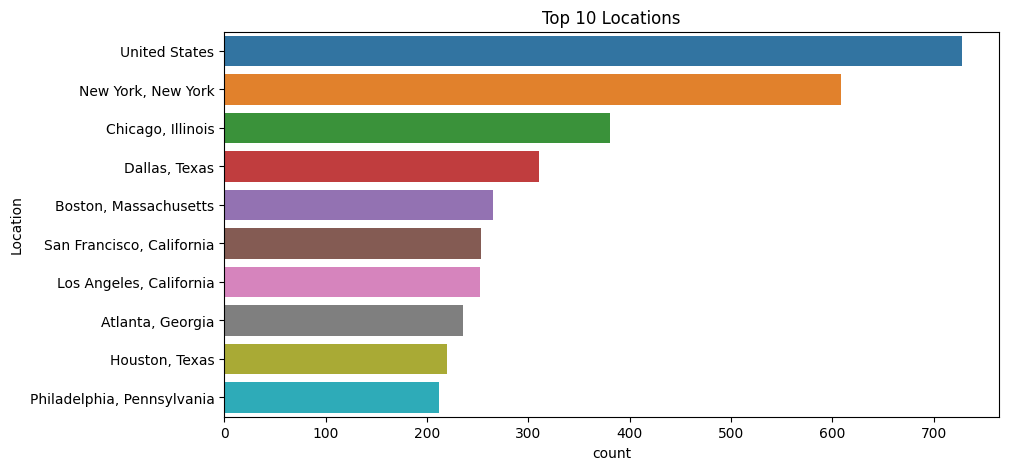

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'].notna()], y='Location', order=df['Location'].value_counts().head(10).index)
plt.title("Top 10 Locations")
plt.show()


# Top Companies

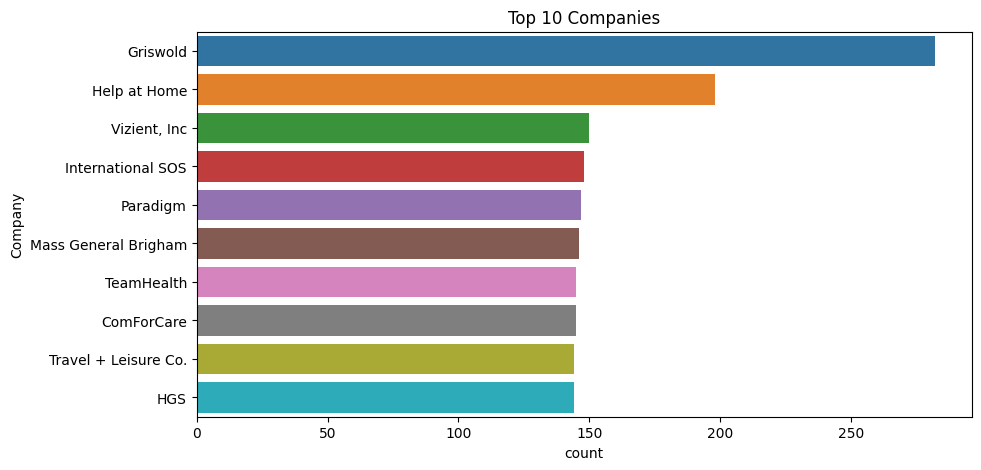

In [70]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Company'].notna()], y='Company', order=df['Company'].value_counts().head(10).index)
plt.title("Top 10 Companies")
plt.show()

# LinkedIn URL Analysis

In [71]:
print(df['LinkedIn URL'].notna().value_counts(normalize=True))


LinkedIn URL
True     0.772492
False    0.227508
Name: proportion, dtype: float64


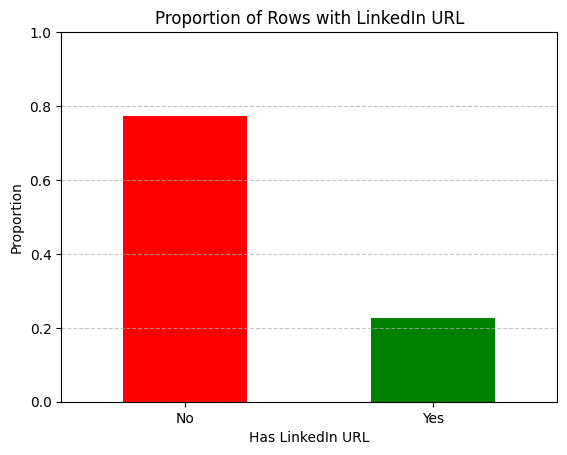

In [72]:
# Get normalized value counts (proportions)
value_counts = df['LinkedIn URL'].notna().value_counts(normalize=True)

# Plot as bar chart
value_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Proportion of Rows with LinkedIn URL')
plt.xlabel('Has LinkedIn URL')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [73]:
print(df['Name'].str.split().str[0].value_counts().head(10))


Name
Michael     251
David       241
Jennifer    206
John        195
Lisa        120
Mark        118
Brian       108
Michelle    105
James       104
Chris       102
Name: count, dtype: int64


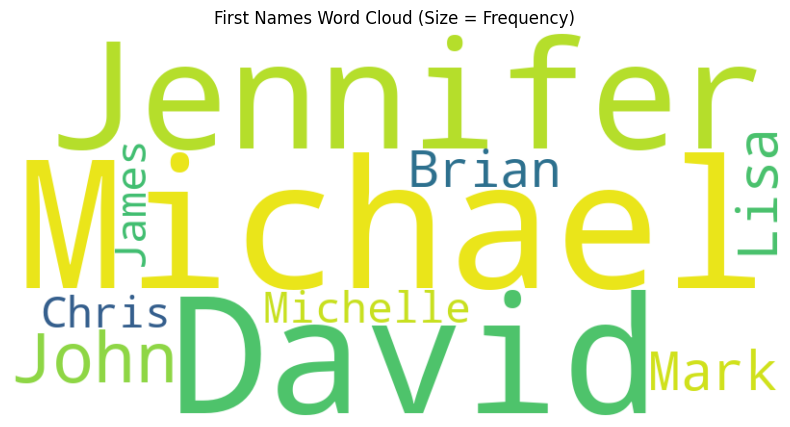

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get frequency counts for all first names (or top 10)
name_counts = df['Name'].str.split().str[0].value_counts().head(10)

# Convert to dictionary for wordcloud
name_freq_dict = name_counts.to_dict()

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(name_freq_dict)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('First Names Word Cloud (Size = Frequency)')
plt.show()


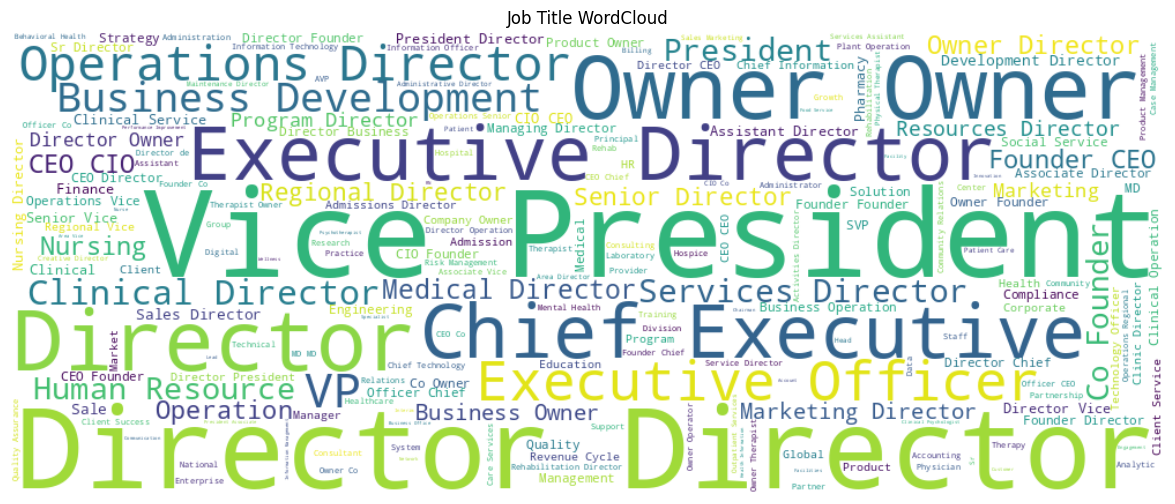

In [75]:
text = " ".join(df['Job Title'].dropna())
wc = WordCloud(width=1000, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Job Title WordCloud")
plt.show()


In [76]:
duplicates = df[df.duplicated(subset=['Name', 'Job Title', 'Domain'], keep=False)]
print(f"🔁 Found {len(duplicates)} suspicious duplicate entries")
display(duplicates)

🔁 Found 1701 suspicious duplicate entries


,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
776,NorthStar Anesthesia,asconsultants.com,Phil Tufts,Vice President of Software & Database Development,"Arlington, Texas",Hospital & Health Care,http://www.linkedin.com/in/phil-tufts-65160057
777,NorthStar Anesthesia,asconsultants.com,Phil Tufts,Vice President of Software & Database Development,"Arlington, Texas",Hospital & Health Care,http://www.linkedin.com/in/phil-tufts-65160057
1069,Atria Senior Living,atriaseniorliving.com,Deanna Deriso,Director of Sales,"Oakdale, New York",Real Estate,http://www.linkedin.com/in/deannaderiso
1070,Atria Senior Living,atriaseniorliving.com,Deanna Deriso,Director of Sales,"Oakdale, New York",Real Estate,http://www.linkedin.com/in/deannaderiso
1071,Atria Senior Living,atriaseniorliving.com,Denese Brooks,Executive Director,"Stamford, Connecticut",Real Estate,http://www.linkedin.com/in/denese-brooks-1856a894
...,...,...,...,...,...,...,...
19738,CarelonRx,zipdrug.com,Jeff W\n------,"Staff Vice President, Clinical Pharmacy Services","Los Angeles, California",Hospital & Health Care,NaN
19835,CarelonRx,zipdrug.com,Stephanie Taylor,Director of Clinical Pharmacy Strategies,"Virginia Beach, Virginia",Hospital & Health Care,http://www.linkedin.com/in/stephanie-taylor-60...
19836,CarelonRx,zipdrug.com,Stephanie Taylor,Director of Clinical Pharmacy Strategies,"Virginia Beach, Virginia",Hospital & Health Care,http://www.linkedin.com/in/stephanie-taylor-60...
19837,CarelonRx,zipdrug.com,Steven Farnen,Pharmacy Account Director,"Asheville, North Carolina",Hospital & Health Care,http://www.linkedin.com/in/steven-farnen-5ab8a74


In [77]:
import pandas as pd

# Count missing (NaN or empty string) values per column
null_counts = df.isnull().sum().sort_values(ascending=False)

# Display as a DataFrame
null_df = pd.DataFrame({
    "Missing (NaN)": null_counts,
})

# Show the result
print("🔍 Null Counts Per Column:\n")
display(null_df)


🔍 Null Counts Per Column:



,Missing (NaN)
LinkedIn URL,4519
Keywords,575
Location,467
Company,304
Domain,0
Name,0
Job Title,0


In [78]:
df.head(5)

,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
0,1019 Senior Living,1019healthcare.com,Heather K\n------,Chief Executive Officer,"Greenfield, Indiana",Hospital & Health Care,NaN
1,1019 Senior Living,1019healthcare.com,Mari Adkins,Executive Director,-,Hospital & Health Care,http://www.linkedin.com/in/mari-adkins-7b1164336
2,NaN,1carekids.com,Rhonda W\n------,VP of Pediatrics,NaN,NaN,NaN
3,1Care Kids,1carekids.com,Courtney K\n------,Director of Community Relations,"Las Vegas, Nevada",Hospital & Health Care,NaN
4,1+1 Cares,1plus1cares.com,Melissa A\n------,Director Of Operations,"San Jose, California",Hospital & Health Care,NaN


# Dataset Cleaning

## Removing unwanted names

In [79]:
import re

def is_valid_name(name):
    if pd.isnull(name):
        return False
    name = name.strip()
    # Check minimum length
    if len(name) < 3:
        return False
    # Check if name contains only letters and spaces
    if not re.match(r'^[A-Za-z\s]+$', name):
        return False
    # Check if name has at least two words
    if len(name.split()) < 2:
        return False
    return True

# Apply filter
# df_valid = df[df['Name'].apply(is_valid_name)].copy()

# Apply filter to get valid names
valid_mask = df['Name'].apply(is_valid_name)
df_valid = df[valid_mask].copy()

# Store rejected names (invalid names)
df_rejected = df[~valid_mask].copy()

print(f'Total Instances: {len(df)}')
print(f'Cleaned Data Instances: {len(df_valid)}')
print(f"Removed {len(df) - len(df_valid)} instances with improper names.")

Total Instances: 19863
Cleaned Data Instances: 15017
Removed 4846 instances with improper names.


In [80]:
df_rejected['Name']

0         Heather K\n------
2          Rhonda W\n------
3        Courtney K\n------
4         Melissa A\n------
5          Trisha C\n------
                ...        
19840        Adam S\n------
19843      Trevor S\n------
19853      Doreen K\n------
19861       Blair M\n------
19862     Michael L\n------
Name: Name, Length: 4846, dtype: object

In [81]:
df.head(5)

,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
0,1019 Senior Living,1019healthcare.com,Heather K\n------,Chief Executive Officer,"Greenfield, Indiana",Hospital & Health Care,NaN
1,1019 Senior Living,1019healthcare.com,Mari Adkins,Executive Director,-,Hospital & Health Care,http://www.linkedin.com/in/mari-adkins-7b1164336
2,NaN,1carekids.com,Rhonda W\n------,VP of Pediatrics,NaN,NaN,NaN
3,1Care Kids,1carekids.com,Courtney K\n------,Director of Community Relations,"Las Vegas, Nevada",Hospital & Health Care,NaN
4,1+1 Cares,1plus1cares.com,Melissa A\n------,Director Of Operations,"San Jose, California",Hospital & Health Care,NaN


In [82]:
df_valid.head(100)

,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
1,1019 Senior Living,1019healthcare.com,Mari Adkins,Executive Director,-,Hospital & Health Care,http://www.linkedin.com/in/mari-adkins-7b1164336
6,1st Aid Home Healthcare,1staidhomehealthcare.com,Tahir Khan,President,"Tulsa, Oklahoma",Hospital & Health Care,http://www.linkedin.com/in/tahir-khan-0b157175
7,1st Call Practice Solutions,1stcallsolutions.com,Cayce Branyon,Company Owner,"Belton, South Carolina",Hospital & Health Care\n+1,http://www.linkedin.com/in/caycebranyon
11,"21st Century Management Services, Inc. dba 21s...",21stcenturyhomecare.com,Judith Joseph,President,"Boston, Massachusetts",Hospital & Health Care,http://www.linkedin.com/in/judith-joseph-12893...
12,24/7 On Site Drug and Alcohol Testing,247onsite.net,Steven Heuel,Vice President,"Corpus Christi, Texas",Hospital & Health Care,http://www.linkedin.com/in/steven-heuel-12695ab1
...,...,...,...,...,...,...,...
139,Lifepoint Health®,accesspoint.health,Alan Mph,SVP & CIO,"Nashville, Tennessee",Hospital & Health Care\n+2,http://www.linkedin.com/in/alan-smith-mph-9ba6094
140,Attendant Care Companies,accofmi.com,Jan Shaik,President & Founder,"West Bloomfield Township, Michigan",Hospital & Health Care,http://www.linkedin.com/in/jan-shaik-8388368b
141,Attendant Care Companies,accofmi.com,Paul Semian,President,"New Baltimore, Michigan",Hospital & Health Care,http://www.linkedin.com/in/paul-semian-910a571
142,Attendant Care Companies,accofmi.com,Sue Mueller,Clinical Director,"Fraser, Michigan",Hospital & Health Care,http://www.linkedin.com/in/sue-mueller-11aba014b


In [83]:
print(f"Instances with Job Title Related to Sales: {df_valid['Job Title'].str.contains('sales', case=False, na=False).sum()}")
# df_valid['Job Title'].str.contains('sales', case=False, na=False)

Instances with Job Title Related to Sales: 444


In [84]:
print(f"Instances before filtering: {len(df_valid)}")

Instances before filtering: 15017


In [85]:
import pandas as pd

# Filter out rows where 'Job Title' contains 'sales' (case-insensitive)
df_valid = df_valid[~df_valid['Job Title'].str.contains('sales', case=False, na=False)].copy()

print(f"Instances after filtering out sales: {len(df_valid)}")

# Optionally, overwrite original DataFrame or save to CSV
# df = df_filtered
# df.to_csv('your_file_filtered.csv', index=False)


Instances after filtering out sales: 14573


In [101]:
import pandas as pd

# Step 1: Define rank map
rank_map = {
    'chief executive officer': 1,
    'ceo': 1,
    'cio': 1,
    'chief information officer': 1,
    'owner': 1,
    'founder': 1,
    'chairman': 1,
    'president': 2,
    'cto': 2,
    'chief technology officer': 2,
    'cso': 2,
    'chief security officer': 2,
    'coo': 2,
    'chief operating officer': 2,
    'cmo': 2,
    'chief medical officer': 2,
    'executive director': 3,
    'director of clinical department': 3,
    'director business development': 3,
    'director': 4,
}

# Step 2: Assign ranks from job titles
def assign_rank(title):
    if pd.isna(title):
        return 999
    title = title.lower()
    # print(title)
    matched_ranks = [
        rank for keyword, rank in rank_map.items() if keyword in title
    ]
    # print(matched_ranks)
    return min(matched_ranks) if matched_ranks else 999

df_valid['Rank'] = df_valid['Job Title'].apply(assign_rank)

# Step 3: Mark top 3 or all based on domain size
def mark_status(group):
    group = group.copy()
    if len(group) <= 3:
        group['Status'] = 'Yes'
    else:
        group = group.sort_values(by='Rank', ascending=True)
        group['Status'] = ['Yes' if i < 3 else 'No' for i in range(len(group))]
    return group

df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)

# Step 4: Final sort and save
df_valid = df_valid.sort_values(by='Domain')
df_valid.to_csv('filtered_top3_by_domain.csv', index=False)
df_valid.to_excel('filtered_top3_by_domain.xlsx', index=False)

print("✅ Done. File saved as 'filtered_top3_by_domain.csv'")


/tmp/ipykernel_36/2989788535.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)


✅ Done. File saved as 'filtered_top3_by_domain.csv'


In [87]:
yes_counts = df_valid[df_valid['Status'] == 'Yes'].groupby('Domain').size().reset_index(name='Yes_Count')
print(len(yes_counts[yes_counts['Yes_Count'] > 3]))


0


In [88]:
print(f'Original Instances Count: {len(df)}')
print(f'Filtered Instances Count: {len(df_valid)}')

Original Instances Count: 19863
Filtered Instances Count: 14573


In [97]:
import os
import glob

files = glob.glob('/kaggle/working/*')
for f in files:
    os.remove(f)

In [98]:
import pandas as pd
import re

# === STEP 0: Load your dataset ===
print("🔄 Loading data...")
# Replace this with your actual file name
input_file = '/kaggle/input/prospect-data/company_data_filter/Working All Data Latest 1 - ApolloProspects.csv'
df = pd.read_csv(input_file)
print(f"Loaded {len(df)} total rows from '{input_file}'.")

# === STEP 1: Clean invalid names ===
def is_valid_name(name):
    if pd.isnull(name):
        return False
    name = name.strip()
    if len(name) < 3:
        return False
    if not re.match(r'^[A-Za-z\s]+$', name):
        return False
    if len(name.split()) < 2:
        return False
    return True

print("\nValidating names...")
valid_mask = df['Name'].apply(is_valid_name)
df_valid = df[valid_mask].copy()
df_rejected = df[~valid_mask].copy()
print(f"Valid names: {len(df_valid)}")
print(f"Rejected rows due to invalid names: {len(df_rejected)}")

# === STEP 2: Filter out sales-related job titles ===
print("\nFiltering out rows where 'Job Title' contains 'sales'...")
before_sales_filter = len(df_valid)
df_valid = df_valid[~df_valid['Job Title'].str.contains('sales', case=False, na=False)].copy()
after_sales_filter = len(df_valid)
print(f"Removed {before_sales_filter - after_sales_filter} 'sales'-related rows.")
print(f"Remaining rows: {after_sales_filter}")

# === STEP 3: Define job title rank mapping ===
print("\nDefining rank map for job titles...")
rank_map = {
    'chief executive officer': 1,
    'ceo': 1,
    'cio': 1,
    'chief information officer': 1,
    'owner': 1,
    'founder': 1,
    'chairman': 1,
    'president': 2,
    'cto': 2,
    'chief technology officer': 2,
    'cso': 2,
    'chief security officer': 2,
    'coo': 2,
    'chief operating officer': 2,
    'cmo': 2,
    'chief medical officer': 2,
    'executive director': 3,
    'director of clinical department': 3,
    'director business development': 3,
    'director': 4,
}

# === STEP 4: Assign ranks to job titles ===
print("Assigning rank based on job titles...")
def assign_rank(title):
    if pd.isna(title):
        return 999
    title = title.lower()
    matched_ranks = [rank for keyword, rank in rank_map.items() if keyword in title]
    return min(matched_ranks) if matched_ranks else 999

df_valid['Rank'] = df_valid['Job Title'].apply(assign_rank)
print("Rank assignment complete.")

# === STEP 5: Mark top 3 per domain ===
print("\nSelecting top 3 ranked individuals per domain...")

def mark_status(group):
    group = group.copy()
    if len(group) <= 3:
        group['Status'] = 'Yes'
    else:
        group = group.sort_values(by='Rank', ascending=True)
        group['Status'] = ['Yes' if i < 3 else 'No' for i in range(len(group))]
    return group

df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)
print("Status column added.")

# === STEP 6: Final sorting and saving ===
df_valid = df_valid.sort_values(by='Domain')

print("\nSaving results...")
df_valid.to_csv('filtered_top3_by_domain.csv', index=False)
df_valid.to_excel('filtered_top3_by_domain.xlsx', index=False)
print("Files saved:")
print("   - filtered_top3_by_domain.csv")
print("   - filtered_top3_by_domain.xlsx")

print(f'Orignal Instance Count: {len(df)}')
print(f'Orignal Instance Count: {len(df_valid)}')
print("\nProgram finished successfully.")


🔄 Loading data...
Loaded 19863 total rows from '/kaggle/input/prospect-data/company_data_filter/Working All Data Latest 1 - ApolloProspects.csv'.

Validating names...
Valid names: 15017
Rejected rows due to invalid names: 4846

Filtering out rows where 'Job Title' contains 'sales'...
Removed 444 'sales'-related rows.
Remaining rows: 14573

Defining rank map for job titles...
Assigning rank based on job titles...
Rank assignment complete.

Selecting top 3 ranked individuals per domain...


/tmp/ipykernel_36/259855729.py:88: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)


Status column added.

Saving results...
Files saved:
   - filtered_top3_by_domain.csv
   - filtered_top3_by_domain.xlsx
Orignal Instance Count: 19863
Orignal Instance Count: 14573

Program finished successfully.
